# Final Project - Ari Webb


This project implements the Teknomo-Fernandez algorithm. The algorithm is an efficient way to generate the background image of a given video sequence. It works off of the overall assumption that "for each pixel position, the majority of the pixel values in the entire video contain the pixel value of the actual background image (at that position)." <sup>1</sup> If this assumption holds, then the algorithm can work in only O(R) time, where R is the resolution of the video. It also only uses binary options and boolean bit operations, which require small amounts of memory.

1. https://arxiv.org/ftp/arxiv/papers/1510/1510.00889.pdf
2. https://www.videezy.com/time-lapse/47642-traffic-in-central-hong-kong


First, we need to import our video and make it into a numpy array.

In [1]:
import cv2
import numpy as np


vid = cv2.VideoCapture('sample.mp4')
count, H, W = int(vid.get(cv2.CAP_PROP_FRAME_COUNT)), int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))

V_buf = np.empty((count, H, W, 3), np.dtype('uint8'))

cur = 0
r = True

while cur < count and r:
    r, V_buf[cur] = vid.read()
    cur += 1


vid.release()


We will now scale down the video so that testing can go faster. I use the resize_image function I wrote for Assignment 0.

In [2]:
def resize_image(input_image, output_rows, output_cols):
    """Resize an image using the nearest neighbor method.

    Args:
        input_image (np.ndarray): RGB image stored as an array, with shape
            `(input_rows, input_cols, 3)`.
        output_rows (int): Number of rows in our desired output image.
        output_cols (int): Number of columns in our desired output image.

    Returns:
        np.ndarray: Resized image, with shape `(output_rows, output_cols, 3)`.
    """
    input_rows, input_cols, channels = input_image.shape
    assert channels == 3

    # 1. Create the resized output image
    output_image = np.zeros(shape=(output_rows, output_cols, 3))

    # 2. Populate the `output_image` array using values from `input_image`
    #    > This should require two nested for loops!

    ### YOUR CODE HERE
    row_scale_factor, column_scale_factor = input_rows/output_rows, input_cols/output_cols
    for i in range(output_rows):
        for j in range(output_cols):
            input_i, input_j = int(i * row_scale_factor), int(j * column_scale_factor)
            output_image[i, j, :] = input_image[input_i, input_j, :]
    ### END YOUR CODE

    # 3. Return the output image
    return output_image

resize_factor = 4
V_buf_new = np.empty((count, H//resize_factor, W//resize_factor, 3), np.dtype('uint8'))
for i in range(V_buf.shape[0]):
    V_buf_new[i, :, :, :] = resize_image(V_buf[i, :, :, :], H//resize_factor, W//resize_factor)

del V_buf
V_buf = np.copy(V_buf_new)
del V_buf_new


Now, we can quickly visualize a few frames.

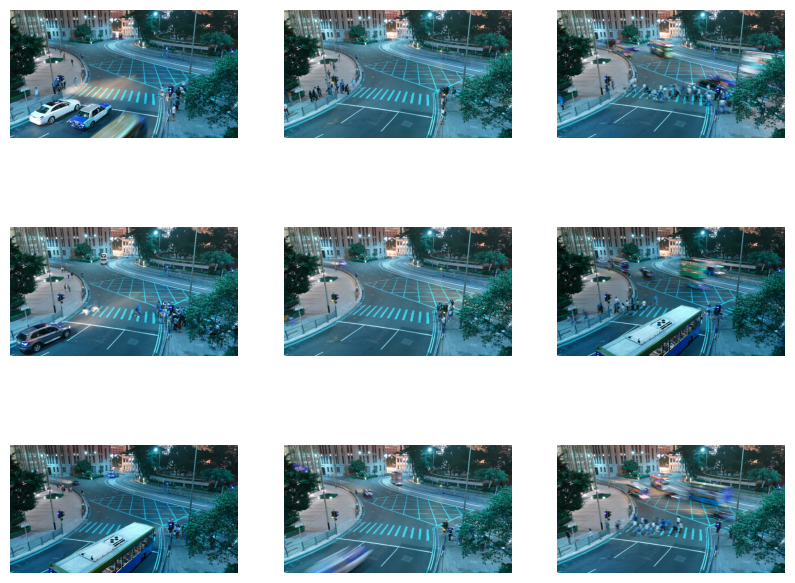

In [3]:
import matplotlib.pyplot as plt

n = len(V_buf)
plt.rcParams['figure.figsize'] = (10.0, 8.0)

inc = (len(V_buf) // 9)

for i in range(9):
    img = V_buf[inc * i]
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

Now let's run Teknomo-Fernandez algorithm, visualizing at each level.

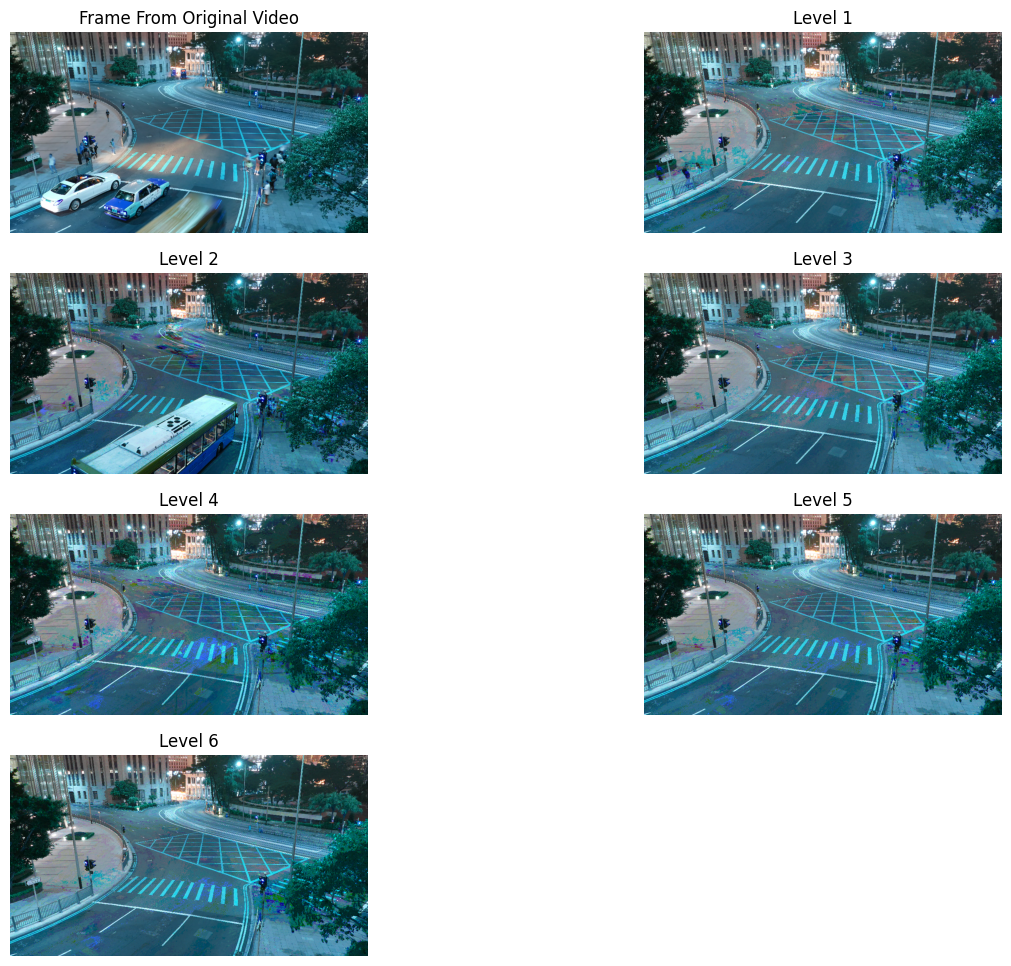

In [5]:
import teknomo_fernandez as tf

plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.subplot(4, 2, 1)
plt.imshow(V_buf[0, :, :, :])
plt.title('Frame From Original Video')
plt.axis('off')

for i in range(1, 7):
    img = tf.backgroundGeneration(V_buf, i)
    plt.subplot(4, 2, i+1)
    plt.imshow(img)
    plt.title('Level ' + str(i))
    plt.axis('off')

plt.savefig('tf_levels.png')
plt.show()